<a href="https://colab.research.google.com/github/kosinovna-1/mathpack2024/blob/main/homework-05/Version_2!!!_MathPack_HW_05_Kosinov_group_bv_02_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Открываем картинку, разбиваем её на RGB составляющие. Для каждой из трёх полученных матриц берём SVD-разложение.

In [1]:
from PIL import Image
import numpy as np
img = Image.open('mouse.jpg')
X = np.array(img, dtype=np.uint8)
RGB = [X[:,:,0],X[:,:,1],X[:,:,2]]
Ur, Sr, Rr = np.linalg.svd(RGB[0], full_matrices=False)
Ug, Sg, Rg = np.linalg.svd(RGB[1], full_matrices=False)
Ub, Sb, Rb = np.linalg.svd(RGB[2], full_matrices=False)

Проверяем размер и вес входного изображения

In [2]:
print('Размер изображения с учётом цветов:',X.shape)
import os
cat_size = os.path.getsize(f'mouse.jpg')
print('Размер исходного файла: {:.2f}'.format(cat_size/1024), 'Кбайт')

Размер изображения с учётом цветов: (1280, 1140, 3)
Размер исходного файла: 245.27 Кбайт


Пишем две функции:
* $new$ - делает приближение порядка $r$. $Upd$: добавляем в функцию плинирование.
* $pict$ - преобразует полученные RGB приближения в единые.

In [3]:
def new(U,S,R,r):
  D = np.hstack((S[:r],np.zeros(len(S)-r)))
  A = U.dot(np.diag(D)).dot(R)
  return A

def pict(r):
  Red = new(Ur,Sr,Rr,r)
  Green = new(Ug,Sg,Rg,r)
  Blue = new(Ub,Sb,Rb,r)
  CAT = np.vstack((Red.flatten(),Green.flatten(),Blue.flatten())).T.reshape(X.shape)
  CAT = Image.fromarray(np.asarray(CAT, dtype=np.uint8))
  return CAT

Сжимаем изображение с порядком, вводимым с консоли

***идёт прогрузка картинки***


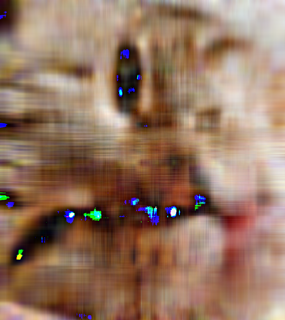

In [4]:
print('***идёт прогрузка картинки***')
CAT = pict(10)
w,h = CAT.size
CAT = CAT.resize((w//4,h//4))
CAT

Наблюдаем артефакты. Перепишем функцию $new$ так, чтобы от этих артефактов избавиться

***идёт прогрузка картинки***


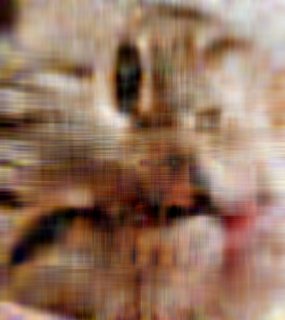

In [5]:
def new(U,S,R,r):
  D = np.hstack((S[:r],np.zeros(len(S)-r)))
  A = U.dot(np.diag(D)).dot(R)
  A[A>255] = 255
  A[A<0] = 0
  return A

print('***идёт прогрузка картинки***')
CAT = pict(10)
w,h = CAT.size
CAT = CAT.resize((w//4,h//4))
CAT

Теперь проследим, как меняется качество картинки при изменении сингулярного значения.

Сингулярное значение r = 1
Размер соответствующего файла №1: 51.43 Кбайт


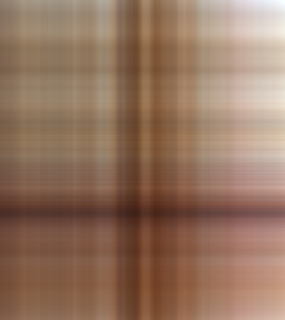

Сингулярное значение r = 2
Размер соответствующего файла №2: 60.09 Кбайт


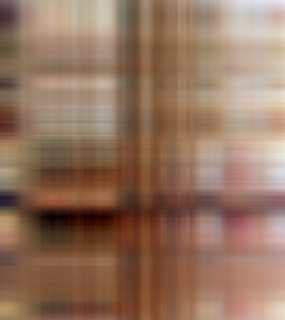

Сингулярное значение r = 10
Размер соответствующего файла №10: 90.84 Кбайт


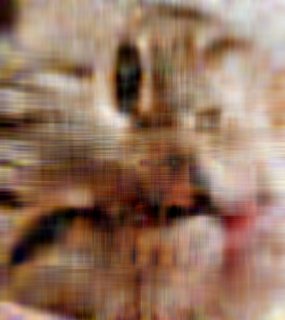

Сингулярное значение r = 30
Размер соответствующего файла №30: 125.92 Кбайт


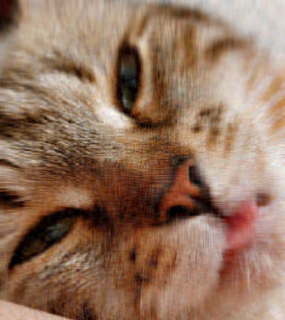

Сингулярное значение r = 100
Размер соответствующего файла №100: 174.39 Кбайт


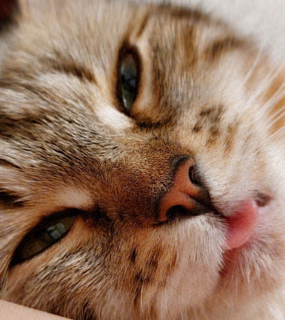

Сингулярное значение r = 1000
Размер соответствующего файла №1000: 206.20 Кбайт


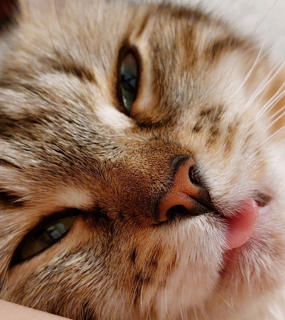

In [6]:
import os
Sings = [1,2,10,30,100,1000]
for r in Sings:
  CAT = pict(r)
  CAT.save(f'cat{r}.jpg')
  cat_size = os.path.getsize(f'cat{r}.jpg')
  w,h = CAT.size
  CAT = CAT.resize((w//4,h//4))
  print('Сингулярное значение r =',r)
  print('Размер соответствующего файла №{}: {:.2f}'.format(r,cat_size/1024), 'Кбайт')
  display(CAT)

In [7]:
import os
for r in Sings:
  cat_size = os.path.getsize(f'cat{r}.jpg')
  print('Размер файла №{}: {:.2f}'.format(r,cat_size/1024), 'Кбайт')

Размер файла №1: 51.43 Кбайт
Размер файла №2: 60.09 Кбайт
Размер файла №10: 90.84 Кбайт
Размер файла №30: 125.92 Кбайт
Размер файла №100: 174.39 Кбайт
Размер файла №1000: 206.20 Кбайт
